In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/Users/toddhendricks/Downloads/CalomirisPritchett_data.csv')

In [36]:
df.head(5)

,ID number,Conveyance,Page,Researcher,Notary First Name,Notary Last Name,Sales Date,Sellers First Name,Sellers Last Name,Sellers County of Origin,...,Interest Rate,Discount Rate,predicted rate,Calculations,Ratio,PresentValue,DUMMY omission,Reason for Omission,Comments,DUMMY Estate Sale
0,1.0,70.0,348,MS,John French,Coffey,10/6/1856,Benjamin,Screws,.,...,NaN,0.00602698,0.07477,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,2.0,70.0,349,MS,William,Shannon,10/7/1856,Santiago,Galseran,New Orleans,...,NaN,0.00602698,0.07477,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,3.0,70.0,351,MS,Edward George,Gottschalk,10/1/1856,Pierre,Macou,New Orleans,...,NaN,0.00602698,0.07477,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,4.0,70.0,352,MS,Paul Emile,Laresche,10/8/1856,Benjamin Franklin,Irby,Vanzand,...,NaN,0.00602698,0.07477,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,5.0,70.0,352,MS,George,Rareshide,10/8/1856,Richard,Condon,New Orleans,...,NaN,0.00602698,0.07477,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [38]:
df.columns

Index(['ID number', 'Conveyance', 'Page', 'Researcher', 'Notary First Name',
       'Notary Last Name', 'Sales Date', 'Sellers First Name',
       'Sellers Last Name', 'Sellers County of Origin',
       'Sellers State of Origin', 'Representing Seller',
       'Relationship to Seller', 'Buyers First Name', 'Buyers Last Name',
       'Buyers County of Origin', 'Buyers State of Origin',
       'Representing Buyer', 'Relationship to Buyer', 'Slave Name', 'Sex',
       'Age', 'Color', 'Occupation', 'Family Relationship', 'Name Child 1',
       'Sex Child 1', 'Age Child 1', 'Name Child 2', 'Sex Child 2',
       'Age Child 2', 'Name Child 3', 'Sex Child 3', 'Age Child 3',
       'Name Child 4', 'Sex Child 4', 'Age Child 4', 'Name Child 5',
       'Sex Child 5', 'Age Child 5', 'Name Child 6', 'Sex Child 6',
       'Age Child 6', 'Name Child 7', 'Sex Child 7', 'Age Child 7',
       'Name Child 8', 'Sex Child 8', 'Age Child 8', 'Guaranteed',
       'Notes on Guarantee', 'Number of Total Slaves',

In [39]:
df['Sales Date'] = pd.to_datetime(df['Sales Date'], errors='coerce')
df = df.set_index(pd.DatetimeIndex(df['Sales Date']))

In [40]:
df['Buyers County of Origin'].value_counts()

New Orleans         8809
.                   1057
Jefferson            329
Iberville            268
Ascension            264
                    ... 
Mississippi City       1
Fulton                 1
Donaldsonville         1
Macon                  1
Newton                 1
Name: Buyers County of Origin, Length: 243, dtype: int64

In [41]:
df['Sellers County of Origin'].value_counts()

New Orleans                 8798
Baltimore                    889
.                            856
Richmond                     687
Mobile                       232
                            ... 
Lewis                          1
Gainsville                     1
St. Charles, New Orleans       1
Owen                           1
Liberty                        1
Name: Sellers County of Origin, Length: 465, dtype: int64

### The vast majority of the buyers and sellers were local

In [42]:
df['Transactions']=df.groupby(df.index)['Representing Seller'].transform('count')

In [43]:
df['Transactions']

Sales Date
1856-10-06    2.0
1856-10-07    1.0
1856-10-01    7.0
1856-10-08    2.0
1856-10-08    2.0
             ... 
NaT           NaN
NaT           NaN
NaT           NaN
NaT           NaN
NaT           NaN
Name: Transactions, Length: 14850, dtype: float64

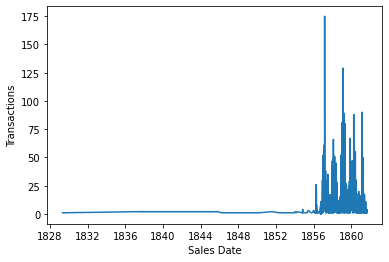

In [46]:
y = df['Transactions']
sns.lineplot(data=df,x=df.index,y=y)

In [47]:
df['Transactions'].max()

175.0

In [48]:
df['Payment Method'].value_counts()

Cash                7177
Cash and Credit     1315
Credit               851
Donation              91
Exchange, Cash        78
Exchange              75
Cash                  19
Barter                15
Barter, Cash           9
Emancipation           7
.                      6
Exchange, Credit       1
Barter, Credit         1
Cash and Credit        1
Name: Payment Method, dtype: int64

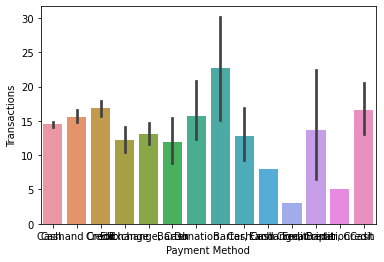

In [50]:
sns.barplot(x=df['Payment Method'],y=df['Transactions'])

In [51]:
df['Sex'].value_counts()

F           7597
M           6996
.             47
M             35
F             27
F              1
Name: Sex, dtype: int64

In [52]:
df['Relationship to Buyer'].value_counts()

.                                      12932
Agent                                    607
Attorney                                 292
Partner in firm                          291
Joint Purchaser                           67
President of Company                      53
Agent and Attorney                        36
Guardian and Agent                        19
Son and Agent                             13
Treasurer of Company                      13
Father and Agent                          13
Husband and Agent                         10
Husband and Attorney                       9
Guardian                                   8
Relative and Agent                         7
Wife and Agent                             6
Mother and Agent                           5
Brother-in-law and Agent                   4
Manager of Company                         3
Guardian                                   3
Executor of the Estate                     2
Daughter and Agent                         2
Father and

In [55]:
df['Occupation'].value_counts()

.                                   14650
Blacksmith                              7
Carpenter                               7
Cook                                    5
Cook, Washer, Ironer                    4
Slater                                  3
Bricklayer                              3
Baker                                   3
Field Hand                              2
Domestic                                2
Cooper                                  2
Plasterer                               2
Field Hand, Teamster                    1
Engineer                                1
House Servant, Seamstress               1
Nanny                                   1
Engineer, Blacksmith                    1
House Servant                           1
Rough Carpenter                         1
Cotton Weigher, Sampler                 1
Midwife                                 1
Washer, Ironer, Tutor, Domestic         1
Pilot                                   1
Cook, Washer, Ironer, Seamstress  

In [56]:
df['Color'].value_counts()

Negro                  8722
.                      2251
Mulatto                1579
Griff                  1328
Black                   349
Dark Griff              118
Yellow                   64
Dark                     39
Creole Negro             36
Quarteroon               29
Brown                    19
Copper                   19
Light Griff              17
Dark Mulatto             12
Dark Negro               11
Creole Mulatto            7
Bright Mulatto            6
Mulatto, Griff            5
Light Mulatto             5
Creole                    5
Light                     3
Negro                     3
Dark Copper               3
.                         2
Chestnut                  2
Yellow, Griff             2
Light Negro               1
Light Black               1
Bright Color              1
Black Negro               1
Albino, Negro             1
Fair Mulatto              1
Griff Creole              1
Light Brown               1
Dark Orange, Griff        1
Colored             

In [84]:
pd.to_numeric(df['Price'], errors='coerce')
df['Price'].isna().value_counts()
df['Price'].dropna(inplace=True)
df['Price'].str.strip()
df['Price']

Sales Date
1856-10-06     650
1856-10-07     550
1856-10-01    1000
1856-10-08    1400
1856-10-08     700
              ... 
1861-04-04     950
1861-05-23     650
1861-08-03    1100
1861-05-07    1600
1861-07-29    1600
Name: Price, Length: 12207, dtype: object

### Find people who were both buyers and sellers 

In [10]:
df2 = df.merge(right=df, left_on='Buyers Last Name', right_on='Sellers Last Name')

In [11]:
df2.columns

Index(['ID number_x', 'Conveyance_x', 'Page_x', 'Researcher_x',
       'Notary First Name_x', 'Notary Last Name_x', 'Sales Date_x',
       'Sellers First Name_x', 'Sellers Last Name_x',
       'Sellers County of Origin_x',
       ...
       'Interest Rate_y', 'Discount Rate_y', 'predicted rate_y',
       'Calculations_y', 'Ratio_y', 'PresentValue_y', 'DUMMY omission_y',
       'Reason for Omission_y', 'Comments_y', 'DUMMY Estate Sale_y'],
      dtype='object', length=142)

In [14]:
df2['Sellers Last Name_x'].unique()

array(['Galseran', 'Kendig', 'Reynolds', ..., 'McChesney', 'Caubette',
       'Drey'], dtype=object)

In [16]:
df2['Sellers Last Name_x'].nunique()

2838